In [1]:
# import libs
import random
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# for inline plots in jupyter
%matplotlib inline


1.Сделать имитатор бросания 2 костей (20 000 бросков).
2.Проверить вероятности выпадения цифр на каждой кости
3.Построить гистограмму выпадения сумм цифр на костях

First dice, possibility of 1 is 0.17
First dice, possibility of 2 is 0.16
First dice, possibility of 3 is 0.16
First dice, possibility of 4 is 0.17
First dice, possibility of 5 is 0.17
First dice, possibility of 6 is 0.17
Second dice, possibility of 1 is 0.17
Second dice, possibility of 2 is 0.16
Second dice, possibility of 3 is 0.17
Second dice, possibility of 4 is 0.16
Second dice, possibility of 5 is 0.17
Second dice, possibility of 6 is 0.17


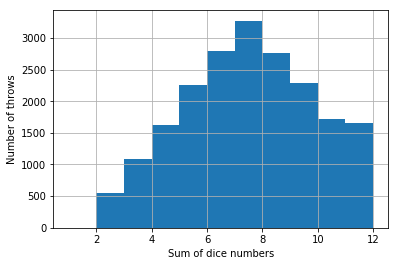

In [2]:
number_of_trials = 20000
first_dice = np.random.randint(1, 7, size=number_of_trials)
second_dice = np.random.randint(1, 7, size=number_of_trials)
list_of_values = first_dice + second_dice


a = Counter(first_dice)
b = Counter(second_dice)
for i in range(1, 7):
    print ('First dice, possibility of', i, 'is', round(a[i]/number_of_trials, 2))
for i in range(1, 7):
    print ('Second dice, possibility of', i, 'is', round(b[i]/number_of_trials, 2))


plt.hist(list_of_values, bins=[i for i in range(1, 13)])
plt.xlabel('Sum of dice numbers')
plt.ylabel('Number of throws')
plt.grid(True)


4. Сделать 10 000 серий бросков. В каждой серии определить количество бросков до выпадения суммы на костях числа 9
5. Визуализировать результат

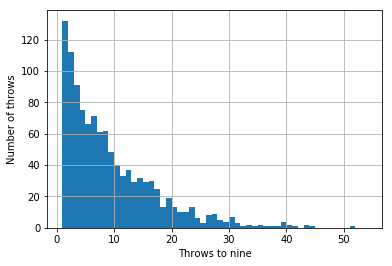

In [3]:
number_of_trials = 10000
list_of_values = []
throws_to_nine = []


for i in range(number_of_trials):
    list_of_values.append(np.random.randint(1, 7) + np.random.randint(1, 7))
    if list_of_values[-1] == 9:
        throws_to_nine.append(len(list_of_values))
        list_of_values.clear()


plt.hist(throws_to_nine, bins=[i for i in range(1, 55)])
plt.xlabel('Throws to nine')
plt.ylabel('Number of throws')
plt.grid(True)


6. Сгенерировать последовательность случайных чисел в диапазоне от 0 до 12, с нормальным распределением
7. Визуализировать результат

/home/igrantua/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Quantity')

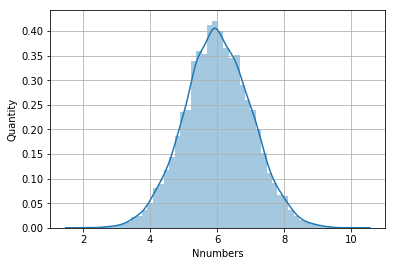

In [4]:
from scipy.stats import truncnorm

a = 0
b = 12
mean = 6
std = 1
len_of_sequence = 10000
random_state = 123456


r = truncnorm.rvs((a - mean) / std, (b - mean) / std, loc=mean, scale=std, size=len_of_sequence, random_state=random_state)

plt.grid(True)
sns.distplot(r)

plt.xlabel('Nnumbers')
plt.ylabel('Quantity')


8. Сгенерировать 2 случайные последовательности. Получить из них третью, каждый элемент которой - сумма соответствующих элементов первых двух последовательностей
9. Визуализировать результат
10. Проверить, что полученное распределение соответствует нормальному распределению

Statistics = 0.9996498227119446 ; p = 0.7442686557769775
Sample looks Gaussian (fail to reject H0)


Text(0, 0.5, 'Quantity')

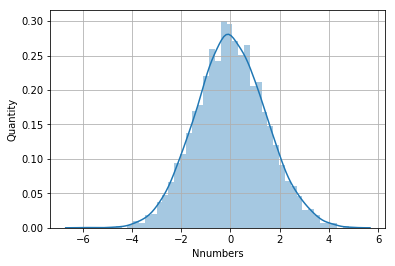

In [5]:
mean, std = 0, 1  # mean and standard deviation
len_of_sequence = 4000

A = np.random.normal(mean, std, len_of_sequence)
B = np.random.normal(mean, std, len_of_sequence)


C = A + B


stat_p = scipy.stats.shapiro(C)
print('Statistics =', stat_p[0], ';', 'p =', stat_p[1])
# interpret
alpha = 1e-3
if stat_p[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


plt.grid(True)
sns.distplot(C)
plt.xlabel('Nnumbers')
plt.ylabel('Quantity')


11. Из двух предыдущих последовательностей получить четвертую, каждый элемент которой равен отношению соответствующих элементов из первой последовательности к элементу второй последовательности
12. Визуализировать результат
13. Проверить подчиняется ли полученная последовательность нормальному распределению.

Statistics = 0.12269866466522217 ; p = 0.0
Sample does not look Gaussian (reject H0)


Text(0, 0.5, 'Quantity')

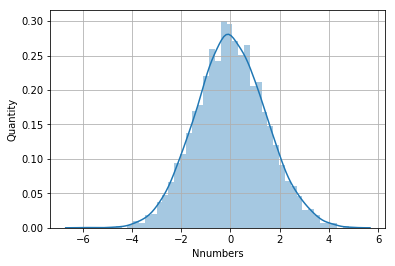

In [6]:
D = A/B


stat_p = scipy.stats.shapiro(D)
print('Statistics =', stat_p[0], ';', 'p =', stat_p[1])
# interpret
alpha = 1e-3
if stat_p[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


plt.grid(True)
sns.distplot(C)
plt.xlabel('Nnumbers')
plt.ylabel('Quantity')


14. Сгенерировать две новые случайные последовательности с разным RandomState.
15. Визуализировать.
16. Проверить корреляцию этих двух последовательностей.

SpearmanrResult(correlation=0.008627350664209416, pvalue=0.5854226218429391)
KendalltauResult(correlation=0.00562465616404101, pvalue=0.5937786013355157)


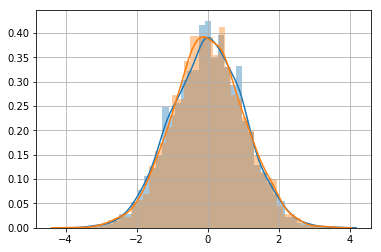

In [7]:
mean, std = 0, 1  # mean and standard deviation
len_of_sequence = 4000
seed_A = 123456
seed_B = 456789

random_state_A = np.random.RandomState(seed_A)
A = random_state_A.normal(mean, std, len_of_sequence)


random_state_B = np.random.RandomState(seed_B)
B = random_state_B.normal(mean, std, len_of_sequence)


spear = scipy.stats.spearmanr(A, B)
print (spear)
kendall = scipy.stats.kendalltau(A, B)
print (kendall)


plt.grid(True)
sns.distplot(A)
sns.distplot(B)
